In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

from sklearn.preprocessing import StandardScaler

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import warnings
# warnings.filterwarnings("ignore")

# Transform clean data for PCA and clustering

### Steps
- Check data year by year for anomolies
- Remove some highly (95-99%) correlated cols 
- write out data
- Visualize stat distributions
- Clip low volume 3pt shooting outliers (sub 1 attempt per 100 poss)
- Log some cols based on plots
- Remove some cols i.e. nationality
- Scale (remove categorical or  unnecessary cols e.g. position percents)
- Save data

### EDITS
- Came back and converted pbp stats to min rates
- reran things as I made adj to datasets e.g. dropping certain cols earlier etc


In [2]:
df_clean = pd.read_csv('bballref_data/clean_1997_to_2020.csv', index_col=0)
df_clean.shape
df_clean.head()

(7363, 91)

player_id pos  age team_id   g    mp   per  ts_pct  \
player                                                                         
Mahmoud Abdul-Rauf 1997   abdulma02  PG   27     SAC  75  2131  13.2   0.524   
Shareef Abdur-Rahim 1997  abdursh01  PF   20     VAN  80  2802  17.4   0.518   
Cory Alexander 1997       alexaco01  PG   23     SAS  80  1454  14.3   0.528   
Jerome Allen 1997         allenje01  SG   24     TOT  76   943   8.7   0.451   
Ray Allen 1997            allenra02  SG   21     MIL  82  2532  14.6   0.541   

                          fg3a_per_fga_pct  fta_per_fga_pct  ...  \
player                                                       ...   
Mahmoud Abdul-Rauf 1997              0.266            0.147  ...   
Shareef Abdur-Rahim 1997             0.022            0.428  ...   
Cory Alexander 1997                  0.514            0.263  ...   
Jerome Allen 1997                    0.421            0.326  ...   
Ray Allen 1997                       0.328            0.274  ...   

                          orb_per_poss  pf_per_poss  pts_per_poss  \
player                                                              
Mahmoud Abdul-Rauf 1997            0.4          4.3          25.5   
Shareef Abdur-Rahim 1997           4.2          3.9          28.9   
Cory Alexander 1997                1.1          5.6          21.8   
Jerome Allen 1997                  1.4          4.8          12.9   
Ray Allen 1997                     2.1          4.6          23.3   

                          stl_per_poss  tov_per_poss  trb_per_poss  height  \
player                                                                       
Mahmoud Abdul-Rauf 1997            1.4           2.9           3.0      73   
Shareef Abdur-Rahim 1997           1.5           4.4          10.7      81   
Cory Alexander 1997                3.1           5.5           4.7      73   
Jerome Allen 1997                  1.8           3.9           5.5      76   
Ray Allen 1997                     1.6           3.2           6.9      77   

                          weight     salary               nationality  
player                                                                 
Mahmoud Abdul-Rauf 1997      162  3100000.0  United States of America  
Shareef Abdur-Rahim 1997     225  2186000.0  United States of America  
Cory Alexander 1997          185   521000.0  United States of America  
Jerome Allen 1997            184   247500.0  United States of America  
Ray Allen 1997               205  1785000.0  United States of America  

[5 rows x 91 columns]

## Convert aggregate play by play stats to rates per min

In [3]:
pbp_agg_conv_rate_cols = ['tov_lost_ball',
                         'tov_bad_pass',
                         'fouls_offensive',
                         'fouls_shooting',
                         'drawn_shooting',
                         'own_shots_blk',
                         'and1s',
                         'astd_pts',
                          'fg_dunk'
                         ]

In [4]:
name_dict = dict(zip(pbp_agg_conv_rate_cols, [col + '_per_min' for col in pbp_agg_conv_rate_cols]))
name_dict

{'tov_lost_ball': 'tov_lost_ball_per_min',
 'tov_bad_pass': 'tov_bad_pass_per_min',
 'fouls_offensive': 'fouls_offensive_per_min',
 'fouls_shooting': 'fouls_shooting_per_min',
 'drawn_shooting': 'drawn_shooting_per_min',
 'own_shots_blk': 'own_shots_blk_per_min',
 'and1s': 'and1s_per_min',
 'astd_pts': 'astd_pts_per_min',
 'fg_dunk': 'fg_dunk_per_min'}

In [5]:
df_clean = pd.read_csv('bballref_data/clean_1997_to_2020.csv', index_col=0)

df_clean[pbp_agg_conv_rate_cols+['mp']].head()
df_clean.loc[:, pbp_agg_conv_rate_cols] = df_clean[pbp_agg_conv_rate_cols].div(df_clean['mp'].values, axis=0)
df_clean.rename(columns=name_dict, inplace=True)
df_clean[list(name_dict.values())].head()
df_clean.shape

df_clean.to_csv('bballref_data/clean_rates_1997_to_2020.csv')

tov_lost_ball  tov_bad_pass  fouls_offensive  \
player                                                                   
Mahmoud Abdul-Rauf 1997              14            73                4   
Shareef Abdur-Rahim 1997             58            85               27   
Cory Alexander 1997                  26            83                9   
Jerome Allen 1997                     4            50                6   
Ray Allen 1997                       32            73               15   

                          fouls_shooting  drawn_shooting  own_shots_blk  \
player                                                                    
Mahmoud Abdul-Rauf 1997               84              29             30   
Shareef Abdur-Rahim 1997              88             220            162   
Cory Alexander 1997                   71              38             23   
Jerome Allen 1997                     25              27             15   
Ray Allen 1997                       109              93             55   

                          and1s  astd_pts  fg_dunk    mp  
player                                                    
Mahmoud Abdul-Rauf 1997       4       409        0  2131  
Shareef Abdur-Rahim 1997     51       387       85  2802  
Cory Alexander 1997           6       540        3  1454  
Jerome Allen 1997             5       346        4   943  
Ray Allen 1997               17       437       21  2532

tov_lost_ball_per_min  tov_bad_pass_per_min  \
player                                                                  
Mahmoud Abdul-Rauf 1997                0.006570              0.034256   
Shareef Abdur-Rahim 1997               0.020700              0.030335   
Cory Alexander 1997                    0.017882              0.057084   
Jerome Allen 1997                      0.004242              0.053022   
Ray Allen 1997                         0.012638              0.028831   

                          fouls_offensive_per_min  fouls_shooting_per_min  \
player                                                                      
Mahmoud Abdul-Rauf 1997                  0.001877                0.039418   
Shareef Abdur-Rahim 1997                 0.009636                0.031406   
Cory Alexander 1997                      0.006190                0.048831   
Jerome Allen 1997                        0.006363                0.026511   
Ray Allen 1997                           0.005924                0.043049   

                          drawn_shooting_per_min  own_shots_blk_per_min  \
player                                                                    
Mahmoud Abdul-Rauf 1997                 0.013609               0.014078   
Shareef Abdur-Rahim 1997                0.078515               0.057816   
Cory Alexander 1997                     0.026135               0.015818   
Jerome Allen 1997                       0.028632               0.015907   
Ray Allen 1997                          0.036730               0.021722   

                          and1s_per_min  astd_pts_per_min  fg_dunk_per_min  
player                                                                      
Mahmoud Abdul-Rauf 1997        0.001877          0.191929         0.000000  
Shareef Abdur-Rahim 1997       0.018201          0.138116         0.030335  
Cory Alexander 1997            0.004127          0.371389         0.002063  
Jerome Allen 1997              0.005302          0.366914         0.004242  
Ray Allen 1997                 0.006714          0.172591         0.008294

(7363, 91)

In [6]:
df_clean['and1s_per_min'].sort_values(ascending=False)

player
Giannis Antetokounmpo 2020    0.049035
Shaquille O'Neal 2002         0.044591
Giannis Antetokounmpo 2019    0.043681
Shaquille O'Neal 1998         0.042759
Montrezl Harrell 2020         0.041166
                                ...   
Ivano Newbill 1997            0.000000
Steve Nash 1997               0.000000
Pablo Prigioni 2015           0.000000
Damjan Rudež 2015             0.000000
Diante Garrett 2014           0.000000
Name: and1s_per_min, Length: 7363, dtype: float64

## Check for data anomolies by the year

In [7]:
df_clean.select_dtypes(np.number).columns

Index(['age', 'g', 'mp', 'per', 'ts_pct', 'fg3a_per_fga_pct',
       'fta_per_fga_pct', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct',
       'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'ows', 'dws', 'ws',
       'ws_per_48', 'obpm', 'dbpm', 'bpm', 'vorp', 'year', 'avg_dist',
       'fg3_heave', 'fg3a_heave', 'fg_dunk_per_min', 'fg_pct', 'fg_pct_00_03',
       'fg_pct_03_10', 'fg_pct_10_16', 'fg_pct_16_xx', 'fg_pct_corner3',
       'fg_pct_fg2a', 'fg_pct_fg3a', 'pct_ast_fg2', 'pct_ast_fg3',
       'pct_fg3a_corner3', 'pct_fga_00_03', 'pct_fga_03_10', 'pct_fga_10_16',
       'pct_fga_16_xx', 'pct_fga_dunk', 'pct_fga_fg2a', 'pct_fga_fg3a',
       'and1s_per_min', 'astd_pts_per_min', 'drawn_shooting_per_min',
       'fouls_offensive_per_min', 'fouls_shooting_per_min',
       'own_shots_blk_per_min', 'pct_pg', 'pct_sg', 'pct_sf', 'pct_pf',
       'pct_c', 'plus_minus_net', 'plus_minus_on', 'tov_bad_pass_per_min',
       'tov_lost_ball_per_min', 'ast_per_poss', 'blk_per_poss', 'def_rtg',
     

In [8]:
len(df_clean.select_dtypes(np.number).columns)

86

### Visualize means over the years

Wall time: 3min 30s


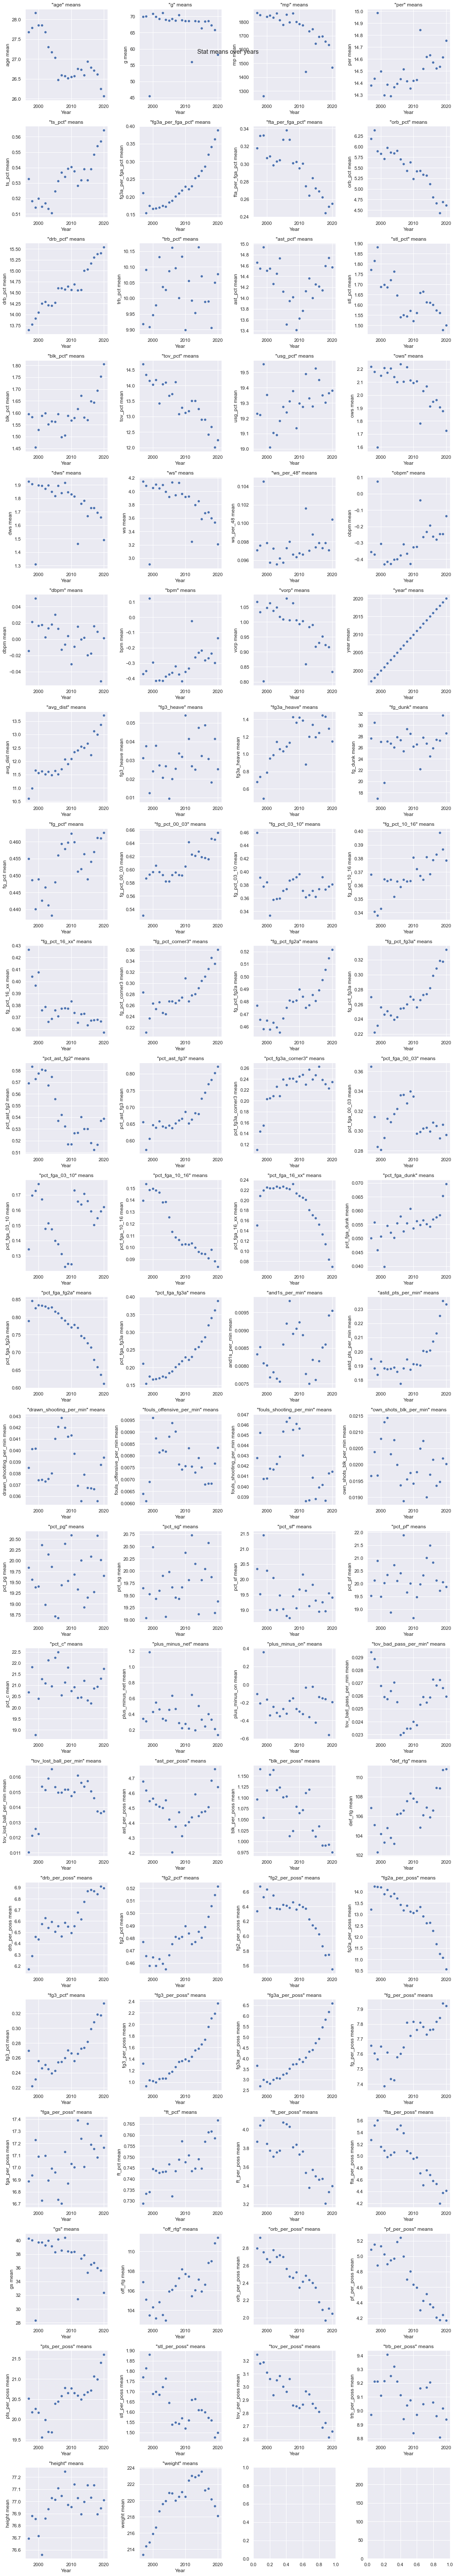

In [30]:
%%time 
year_grpby = df_clean.groupby('year')
years = [n for n in range(1997, 2021)]

fig, axes = plt.subplots(nrows=22, ncols=4, figsize=(15,84))

for col, ax in zip(df_clean.select_dtypes(np.number).columns, axes.reshape(-1)):    
    y = year_grpby[col].mean()
    s = sns.scatterplot(x=years, y=y, ax=ax)
    s.set_xlabel('Year')
    s.set_ylabel(f'{col} mean')
    s.set_title(f'"{col}" means')
    plt.ylim(0, y.max() + y.max()/10)
    plt.tight_layout()
fig
fig.suptitle('Stat means over years')
plt.savefig('all_stat_means_by_year.png')

### Some interesting graphs. 1999 seems to be an outlier year based on ws stats
- 1999 data does like pretty suspicious (`and1s`, `tov_bad_pass`, `own_shots_blk`, `drawn_shooting`, etc)

In [9]:
df_clean[df_clean['year']==1999].mean()[['and1s_per_min', 'tov_lost_ball_per_min']]

and1s_per_min            0.008082
tov_lost_ball_per_min    0.012590
dtype: float64

### BBall ref does warn that play-by-play data is less accurate for 1996-97 - 1999-00 seasons

## See correlations

### Find all highly correlated column pairs

In [10]:
corr_mat = df_clean.corr().abs()
corrs = corr_mat.unstack().sort_values(ascending=False)
high_corr_pairs = corrs[corrs>=0.9].index
high_corr_pairs = [pair for pair in high_corr_pairs if pair[0] != pair[1]][::2]  # remove the redundant pairs i.e. (a,a) and select one of [(a,b), (b,a)] 
print('Number of column pairs with over 90% correlation:', len(high_corr_pairs), '\n\n')
high_corr_dict = {pair: corrs[pair] for pair in high_corr_pairs}

for key in high_corr_dict:
    print(key)
    print(high_corr_dict[key])
    print()

Number of column pairs with over 90% correlation: 42 


('pct_fga_fg2a', 'pct_fga_fg3a')
0.9999999763123021

('fg3_pct', 'fg_pct_fg3a')
0.9999999563766842

('pct_fga_fg3a', 'fg3a_per_fga_pct')
0.9999999186448905

('fg3a_per_fga_pct', 'pct_fga_fg2a')
0.999999894904144

('fg_pct_fg2a', 'fg2_pct')
0.9999986411100128

('stl_per_poss', 'stl_pct')
0.9999625713415567

('trb_pct', 'trb_per_poss')
0.997987912391446

('orb_pct', 'orb_per_poss')
0.9975381399601648

('drb_per_poss', 'drb_pct')
0.9954116370573545

('blk_pct', 'blk_per_poss')
0.9908700184755143

('ast_per_poss', 'astd_pts_per_min')
0.9904724383399458

('ast_per_poss', 'ast_pct')
0.9897608999263747

('fg3_per_poss', 'fg3a_per_poss')
0.9850956409267927

('astd_pts_per_min', 'ast_pct')
0.9807965322501768

('usg_pct', 'fga_per_poss')
0.9648606609772552

('drb_pct', 'trb_pct')
0.9602230059068722

('fg2_per_poss', 'fg2a_per_poss')
0.9598980244929292

('drb_per_poss', 'trb_pct')
0.9590172791215741

('fta_per_poss', 'ft_per_poss')
0.9587506

### Cool that astd_pts is highly correlated with tov_bad_pass

## Drop entirely redundant columns i.e. one of %fgs 2s and %fgs 3s and WS stats

In [11]:
drop_cols = ['pct_fga_fg2a', # redundant with 'pct_fga_fg3a'
             'fg_pct_fg3a',  # same as 'fg3_pct'
             'fg3a_per_fga_pct', # same as 'pct_fga_fg3a'  , what's being dropped is in advanced stats called 3PAr (3point attempt rate)
             'fg_pct_fg2a',  # same as 'fg2_pct'
             'stl_per_poss', # same as stl pct
             'trb_per_poss',
             'orb_per_poss',
             'drb_per_poss',
             'blk_per_poss',
             'ast_per_poss',
             'tov_per_poss',
             'ws',
             'ows',
             'dws',
             'ws_per_48',
            ]

df_slim = df_clean.drop(drop_cols, axis=1).copy()

In [12]:
df_slim.to_csv('bballref_data/slim_1997_to_2020_no_trans.csv')

### Run same analysis as above for `df_slim`

In [13]:
corr_mat = df_slim.corr().abs()
corrs = corr_mat.unstack().sort_values(ascending=False)
high_corr_pairs = corrs[corrs>=0.9].index
high_corr_pairs = [pair for pair in high_corr_pairs if pair[0] != pair[1]][::2]  # remove the redundant pairs i.e. (a,a) and select one of [(a,b), (b,a)] 
print('Number of column pairs with over 90% correlation:', len(high_corr_pairs), '\n\n')
high_corr_dict = {pair: corrs[pair] for pair in high_corr_pairs}

for key in high_corr_dict:
    print(key)
    print(high_corr_dict[key])
    print()

Number of column pairs with over 90% correlation: 19 


('fg3a_per_poss', 'fg3_per_poss')
0.9850956409267927

('ast_pct', 'astd_pts_per_min')
0.9807965322501768

('usg_pct', 'fga_per_poss')
0.9648606609772552

('trb_pct', 'drb_pct')
0.9602230059068722

('fg2a_per_poss', 'fg2_per_poss')
0.9598980244929292

('fta_per_poss', 'ft_per_poss')
0.9587506242914291

('fg_per_poss', 'pts_per_poss')
0.9551091828565098

('pts_per_poss', 'usg_pct')
0.9487050264146628

('drawn_shooting_per_min', 'fta_per_poss')
0.9467939555679319

('fg3a_per_poss', 'pct_fga_fg3a')
0.9321861555340112

('bpm', 'vorp')
0.9304881426065524

('fga_per_poss', 'pts_per_poss')
0.9244380837919028

('pct_fga_fg3a', 'fg3_per_poss')
0.9201273895180364

('fg_per_poss', 'usg_pct')
0.9178233044718171

('pct_fga_dunk', 'fg_dunk_per_min')
0.9168806815154599

('fga_per_poss', 'fg_per_poss')
0.9165025908891877

('orb_pct', 'trb_pct')
0.9041540382825459

('bpm', 'obpm')
0.9004749528004523

('avg_dist', 'pct_fga_00_03')
0.9004132173772849

### Many of these are correlations between attempts and makes, going to keep obvi

## Heaves?  ... seems to correlate with good guards

In [14]:
heave_cols = df_slim.columns[df_slim.columns.str.contains('heave')]
df_slim[heave_cols].sort_values('fg3a_heave', ascending=False)[0:20]

fg3_heave  fg3a_heave
player                                    
Stephen Curry 2017           1          18
Luka Dončić 2019             1          14
Ray Allen 1998               1          14
Andre Miller 2001            1          13
Jason Williams 2001          1          12
Ray Allen 2000               0          12
Andre Miller 2008            0          11
Stephen Curry 2016           2          11
Aaron Brooks 2009            0          11
Chris Paul 2020              0          11
Stephen Curry 2019           1          11
Jason Kidd 2002              0          11
Kyle Lowry 2008              0          10
Dwyane Wade 2006             0          10
Andre Miller 2002            0          10
Andre Miller 2003            0          10
Steve Blake 2008             1          10
Andre Miller 2007            0          10
Monta Ellis 2011             1          10
Andre Miller 2006            1          10

In [15]:
num_cols = df_slim.select_dtypes(np.number).columns.drop(['year'])
len(num_cols)
num_cols

70

Index(['age', 'g', 'mp', 'per', 'ts_pct', 'fta_per_fga_pct', 'orb_pct',
       'drb_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct',
       'usg_pct', 'obpm', 'dbpm', 'bpm', 'vorp', 'avg_dist', 'fg3_heave',
       'fg3a_heave', 'fg_dunk_per_min', 'fg_pct', 'fg_pct_00_03',
       'fg_pct_03_10', 'fg_pct_10_16', 'fg_pct_16_xx', 'fg_pct_corner3',
       'pct_ast_fg2', 'pct_ast_fg3', 'pct_fg3a_corner3', 'pct_fga_00_03',
       'pct_fga_03_10', 'pct_fga_10_16', 'pct_fga_16_xx', 'pct_fga_dunk',
       'pct_fga_fg3a', 'and1s_per_min', 'astd_pts_per_min',
       'drawn_shooting_per_min', 'fouls_offensive_per_min',
       'fouls_shooting_per_min', 'own_shots_blk_per_min', 'pct_pg', 'pct_sg',
       'pct_sf', 'pct_pf', 'pct_c', 'plus_minus_net', 'plus_minus_on',
       'tov_bad_pass_per_min', 'tov_lost_ball_per_min', 'def_rtg', 'fg2_pct',
       'fg2_per_poss', 'fg2a_per_poss', 'fg3_pct', 'fg3_per_poss',
       'fg3a_per_poss', 'fg_per_poss', 'fga_per_poss', 'ft_pct', 'ft_per_poss',


### need positive only cols also for log

In [16]:
positive_cols = [col for col in num_cols if (df_slim[col]>=0.0).all()]
negative_cols = set(num_cols) - set(positive_cols)
len(positive_cols)
positive_cols

print('\n\n')
print('cols with negatives:', negative_cols)

64

['age',
 'g',
 'mp',
 'per',
 'ts_pct',
 'fta_per_fga_pct',
 'orb_pct',
 'drb_pct',
 'trb_pct',
 'ast_pct',
 'stl_pct',
 'blk_pct',
 'tov_pct',
 'usg_pct',
 'avg_dist',
 'fg3_heave',
 'fg3a_heave',
 'fg_dunk_per_min',
 'fg_pct',
 'fg_pct_00_03',
 'fg_pct_03_10',
 'fg_pct_10_16',
 'fg_pct_16_xx',
 'fg_pct_corner3',
 'pct_ast_fg2',
 'pct_ast_fg3',
 'pct_fg3a_corner3',
 'pct_fga_00_03',
 'pct_fga_03_10',
 'pct_fga_10_16',
 'pct_fga_16_xx',
 'pct_fga_dunk',
 'pct_fga_fg3a',
 'and1s_per_min',
 'astd_pts_per_min',
 'drawn_shooting_per_min',
 'fouls_offensive_per_min',
 'fouls_shooting_per_min',
 'own_shots_blk_per_min',
 'pct_pg',
 'pct_sg',
 'pct_sf',
 'pct_pf',
 'pct_c',
 'tov_bad_pass_per_min',
 'tov_lost_ball_per_min',
 'def_rtg',
 'fg2_pct',
 'fg2_per_poss',
 'fg2a_per_poss',
 'fg3_pct',
 'fg3_per_poss',
 'fg3a_per_poss',
 'fg_per_poss',
 'fga_per_poss',
 'ft_pct',
 'ft_per_poss',
 'fta_per_poss',
 'gs',
 'off_rtg',
 'pf_per_poss',
 'pts_per_poss',
 'height',
 'weight']




cols with negatives: {'obpm', 'bpm', 'vorp', 'plus_minus_on', 'dbpm', 'plus_minus_net'}


## Plot the stat distributions normal and logged

<AxesSubplot:>

Text(0.5, 1.0, 'age: original')

<AxesSubplot:xlabel='age', ylabel='Count'>

Text(0.5, 1.0, 'age: original')

<AxesSubplot:>

Text(0.5, 1.0, 'age: log transformed')

<AxesSubplot:xlabel='age', ylabel='Count'>

Text(0.5, 1.0, 'age: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'g: original')

<AxesSubplot:xlabel='g', ylabel='Count'>

Text(0.5, 1.0, 'g: original')

<AxesSubplot:>

Text(0.5, 1.0, 'g: log transformed')

<AxesSubplot:xlabel='g', ylabel='Count'>

Text(0.5, 1.0, 'g: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'mp: original')

<AxesSubplot:xlabel='mp', ylabel='Count'>

Text(0.5, 1.0, 'mp: original')

<AxesSubplot:>

Text(0.5, 1.0, 'mp: log transformed')

<AxesSubplot:xlabel='mp', ylabel='Count'>

Text(0.5, 1.0, 'mp: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'per: original')

<AxesSubplot:xlabel='per', ylabel='Count'>

Text(0.5, 1.0, 'per: original')

<AxesSubplot:>

Text(0.5, 1.0, 'per: log transformed')

<AxesSubplot:xlabel='per', ylabel='Count'>

Text(0.5, 1.0, 'per: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'ts_pct: original')

<AxesSubplot:xlabel='ts_pct', ylabel='Count'>

Text(0.5, 1.0, 'ts_pct: original')

<AxesSubplot:>

Text(0.5, 1.0, 'ts_pct: log transformed')

<AxesSubplot:xlabel='ts_pct', ylabel='Count'>

Text(0.5, 1.0, 'ts_pct: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'fta_per_fga_pct: original')

<AxesSubplot:xlabel='fta_per_fga_pct', ylabel='Count'>

Text(0.5, 1.0, 'fta_per_fga_pct: original')

<AxesSubplot:>

Text(0.5, 1.0, 'fta_per_fga_pct: log transformed')

<AxesSubplot:xlabel='fta_per_fga_pct', ylabel='Count'>

Text(0.5, 1.0, 'fta_per_fga_pct: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'orb_pct: original')

<AxesSubplot:xlabel='orb_pct', ylabel='Count'>

Text(0.5, 1.0, 'orb_pct: original')

<AxesSubplot:>

Text(0.5, 1.0, 'orb_pct: log transformed')

<AxesSubplot:xlabel='orb_pct', ylabel='Count'>

Text(0.5, 1.0, 'orb_pct: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'drb_pct: original')

<AxesSubplot:xlabel='drb_pct', ylabel='Count'>

Text(0.5, 1.0, 'drb_pct: original')

<AxesSubplot:>

Text(0.5, 1.0, 'drb_pct: log transformed')

<AxesSubplot:xlabel='drb_pct', ylabel='Count'>

Text(0.5, 1.0, 'drb_pct: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'trb_pct: original')

<AxesSubplot:xlabel='trb_pct', ylabel='Count'>

Text(0.5, 1.0, 'trb_pct: original')

<AxesSubplot:>

Text(0.5, 1.0, 'trb_pct: log transformed')

<AxesSubplot:xlabel='trb_pct', ylabel='Count'>

Text(0.5, 1.0, 'trb_pct: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'ast_pct: original')

<AxesSubplot:xlabel='ast_pct', ylabel='Count'>

Text(0.5, 1.0, 'ast_pct: original')

<AxesSubplot:>

Text(0.5, 1.0, 'ast_pct: log transformed')

<AxesSubplot:xlabel='ast_pct', ylabel='Count'>

Text(0.5, 1.0, 'ast_pct: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'stl_pct: original')

<AxesSubplot:xlabel='stl_pct', ylabel='Count'>

Text(0.5, 1.0, 'stl_pct: original')

<AxesSubplot:>

Text(0.5, 1.0, 'stl_pct: log transformed')

<AxesSubplot:xlabel='stl_pct', ylabel='Count'>

Text(0.5, 1.0, 'stl_pct: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'blk_pct: original')

<AxesSubplot:xlabel='blk_pct', ylabel='Count'>

Text(0.5, 1.0, 'blk_pct: original')

<AxesSubplot:>

Text(0.5, 1.0, 'blk_pct: log transformed')

<AxesSubplot:xlabel='blk_pct', ylabel='Count'>

Text(0.5, 1.0, 'blk_pct: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'tov_pct: original')

<AxesSubplot:xlabel='tov_pct', ylabel='Count'>

Text(0.5, 1.0, 'tov_pct: original')

<AxesSubplot:>

Text(0.5, 1.0, 'tov_pct: log transformed')

<AxesSubplot:xlabel='tov_pct', ylabel='Count'>

Text(0.5, 1.0, 'tov_pct: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'usg_pct: original')

<AxesSubplot:xlabel='usg_pct', ylabel='Count'>

Text(0.5, 1.0, 'usg_pct: original')

<AxesSubplot:>

Text(0.5, 1.0, 'usg_pct: log transformed')

<AxesSubplot:xlabel='usg_pct', ylabel='Count'>

Text(0.5, 1.0, 'usg_pct: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'avg_dist: original')

<AxesSubplot:xlabel='avg_dist', ylabel='Count'>

Text(0.5, 1.0, 'avg_dist: original')

<AxesSubplot:>

Text(0.5, 1.0, 'avg_dist: log transformed')

<AxesSubplot:xlabel='avg_dist', ylabel='Count'>

Text(0.5, 1.0, 'avg_dist: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'fg3_heave: original')

<AxesSubplot:xlabel='fg3_heave', ylabel='Count'>

Text(0.5, 1.0, 'fg3_heave: original')

<AxesSubplot:>

Text(0.5, 1.0, 'fg3_heave: log transformed')

<AxesSubplot:xlabel='fg3_heave', ylabel='Count'>

Text(0.5, 1.0, 'fg3_heave: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'fg3a_heave: original')

<AxesSubplot:xlabel='fg3a_heave', ylabel='Count'>

Text(0.5, 1.0, 'fg3a_heave: original')

<AxesSubplot:>

Text(0.5, 1.0, 'fg3a_heave: log transformed')

<AxesSubplot:xlabel='fg3a_heave', ylabel='Count'>

Text(0.5, 1.0, 'fg3a_heave: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'fg_dunk: original')

<AxesSubplot:xlabel='fg_dunk', ylabel='Count'>

Text(0.5, 1.0, 'fg_dunk: original')

<AxesSubplot:>

Text(0.5, 1.0, 'fg_dunk: log transformed')

<AxesSubplot:xlabel='fg_dunk', ylabel='Count'>

Text(0.5, 1.0, 'fg_dunk: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'fg_pct: original')

<AxesSubplot:xlabel='fg_pct', ylabel='Count'>

Text(0.5, 1.0, 'fg_pct: original')

<AxesSubplot:>

Text(0.5, 1.0, 'fg_pct: log transformed')

<AxesSubplot:xlabel='fg_pct', ylabel='Count'>

Text(0.5, 1.0, 'fg_pct: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'fg_pct_00_03: original')

<AxesSubplot:xlabel='fg_pct_00_03', ylabel='Count'>

Text(0.5, 1.0, 'fg_pct_00_03: original')

<AxesSubplot:>

Text(0.5, 1.0, 'fg_pct_00_03: log transformed')

<AxesSubplot:xlabel='fg_pct_00_03', ylabel='Count'>

Text(0.5, 1.0, 'fg_pct_00_03: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'fg_pct_03_10: original')

<AxesSubplot:xlabel='fg_pct_03_10', ylabel='Count'>

Text(0.5, 1.0, 'fg_pct_03_10: original')

<AxesSubplot:>

Text(0.5, 1.0, 'fg_pct_03_10: log transformed')

<AxesSubplot:xlabel='fg_pct_03_10', ylabel='Count'>

Text(0.5, 1.0, 'fg_pct_03_10: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'fg_pct_10_16: original')

<AxesSubplot:xlabel='fg_pct_10_16', ylabel='Count'>

Text(0.5, 1.0, 'fg_pct_10_16: original')

<AxesSubplot:>

Text(0.5, 1.0, 'fg_pct_10_16: log transformed')

<AxesSubplot:xlabel='fg_pct_10_16', ylabel='Count'>

Text(0.5, 1.0, 'fg_pct_10_16: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'fg_pct_16_xx: original')

<AxesSubplot:xlabel='fg_pct_16_xx', ylabel='Count'>

Text(0.5, 1.0, 'fg_pct_16_xx: original')

<AxesSubplot:>

Text(0.5, 1.0, 'fg_pct_16_xx: log transformed')

<AxesSubplot:xlabel='fg_pct_16_xx', ylabel='Count'>

Text(0.5, 1.0, 'fg_pct_16_xx: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'fg_pct_corner3: original')

<AxesSubplot:xlabel='fg_pct_corner3', ylabel='Count'>

Text(0.5, 1.0, 'fg_pct_corner3: original')

<AxesSubplot:>

Text(0.5, 1.0, 'fg_pct_corner3: log transformed')

<AxesSubplot:xlabel='fg_pct_corner3', ylabel='Count'>

Text(0.5, 1.0, 'fg_pct_corner3: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'pct_ast_fg2: original')

<AxesSubplot:xlabel='pct_ast_fg2', ylabel='Count'>

Text(0.5, 1.0, 'pct_ast_fg2: original')

<AxesSubplot:>

Text(0.5, 1.0, 'pct_ast_fg2: log transformed')

<AxesSubplot:xlabel='pct_ast_fg2', ylabel='Count'>

Text(0.5, 1.0, 'pct_ast_fg2: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'pct_ast_fg3: original')

<AxesSubplot:xlabel='pct_ast_fg3', ylabel='Count'>

Text(0.5, 1.0, 'pct_ast_fg3: original')

<AxesSubplot:>

Text(0.5, 1.0, 'pct_ast_fg3: log transformed')

<AxesSubplot:xlabel='pct_ast_fg3', ylabel='Count'>

Text(0.5, 1.0, 'pct_ast_fg3: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'pct_fg3a_corner3: original')

<AxesSubplot:xlabel='pct_fg3a_corner3', ylabel='Count'>

Text(0.5, 1.0, 'pct_fg3a_corner3: original')

<AxesSubplot:>

Text(0.5, 1.0, 'pct_fg3a_corner3: log transformed')

<AxesSubplot:xlabel='pct_fg3a_corner3', ylabel='Count'>

Text(0.5, 1.0, 'pct_fg3a_corner3: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'pct_fga_00_03: original')

<AxesSubplot:xlabel='pct_fga_00_03', ylabel='Count'>

Text(0.5, 1.0, 'pct_fga_00_03: original')

<AxesSubplot:>

Text(0.5, 1.0, 'pct_fga_00_03: log transformed')

<AxesSubplot:xlabel='pct_fga_00_03', ylabel='Count'>

Text(0.5, 1.0, 'pct_fga_00_03: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'pct_fga_03_10: original')

<AxesSubplot:xlabel='pct_fga_03_10', ylabel='Count'>

Text(0.5, 1.0, 'pct_fga_03_10: original')

<AxesSubplot:>

Text(0.5, 1.0, 'pct_fga_03_10: log transformed')

<AxesSubplot:xlabel='pct_fga_03_10', ylabel='Count'>

Text(0.5, 1.0, 'pct_fga_03_10: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'pct_fga_10_16: original')

<AxesSubplot:xlabel='pct_fga_10_16', ylabel='Count'>

Text(0.5, 1.0, 'pct_fga_10_16: original')

<AxesSubplot:>

Text(0.5, 1.0, 'pct_fga_10_16: log transformed')

<AxesSubplot:xlabel='pct_fga_10_16', ylabel='Count'>

Text(0.5, 1.0, 'pct_fga_10_16: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'pct_fga_16_xx: original')

<AxesSubplot:xlabel='pct_fga_16_xx', ylabel='Count'>

Text(0.5, 1.0, 'pct_fga_16_xx: original')

<AxesSubplot:>

Text(0.5, 1.0, 'pct_fga_16_xx: log transformed')

<AxesSubplot:xlabel='pct_fga_16_xx', ylabel='Count'>

Text(0.5, 1.0, 'pct_fga_16_xx: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'pct_fga_dunk: original')

<AxesSubplot:xlabel='pct_fga_dunk', ylabel='Count'>

Text(0.5, 1.0, 'pct_fga_dunk: original')

<AxesSubplot:>

Text(0.5, 1.0, 'pct_fga_dunk: log transformed')

<AxesSubplot:xlabel='pct_fga_dunk', ylabel='Count'>

Text(0.5, 1.0, 'pct_fga_dunk: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'pct_fga_fg3a: original')

<AxesSubplot:xlabel='pct_fga_fg3a', ylabel='Count'>

Text(0.5, 1.0, 'pct_fga_fg3a: original')

<AxesSubplot:>

Text(0.5, 1.0, 'pct_fga_fg3a: log transformed')

<AxesSubplot:xlabel='pct_fga_fg3a', ylabel='Count'>

Text(0.5, 1.0, 'pct_fga_fg3a: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'and1s_per_min: original')

<AxesSubplot:xlabel='and1s_per_min', ylabel='Count'>

Text(0.5, 1.0, 'and1s_per_min: original')

<AxesSubplot:>

Text(0.5, 1.0, 'and1s_per_min: log transformed')

<AxesSubplot:xlabel='and1s_per_min', ylabel='Count'>

Text(0.5, 1.0, 'and1s_per_min: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'astd_pts_per_min: original')

<AxesSubplot:xlabel='astd_pts_per_min', ylabel='Count'>

Text(0.5, 1.0, 'astd_pts_per_min: original')

<AxesSubplot:>

Text(0.5, 1.0, 'astd_pts_per_min: log transformed')

<AxesSubplot:xlabel='astd_pts_per_min', ylabel='Count'>

Text(0.5, 1.0, 'astd_pts_per_min: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'drawn_shooting_per_min: original')

<AxesSubplot:xlabel='drawn_shooting_per_min', ylabel='Count'>

Text(0.5, 1.0, 'drawn_shooting_per_min: original')

<AxesSubplot:>

Text(0.5, 1.0, 'drawn_shooting_per_min: log transformed')

<AxesSubplot:xlabel='drawn_shooting_per_min', ylabel='Count'>

Text(0.5, 1.0, 'drawn_shooting_per_min: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'fouls_offensive_per_min: original')

<AxesSubplot:xlabel='fouls_offensive_per_min', ylabel='Count'>

Text(0.5, 1.0, 'fouls_offensive_per_min: original')

<AxesSubplot:>

Text(0.5, 1.0, 'fouls_offensive_per_min: log transformed')

<AxesSubplot:xlabel='fouls_offensive_per_min', ylabel='Count'>

Text(0.5, 1.0, 'fouls_offensive_per_min: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'fouls_shooting_per_min: original')

<AxesSubplot:xlabel='fouls_shooting_per_min', ylabel='Count'>

Text(0.5, 1.0, 'fouls_shooting_per_min: original')

<AxesSubplot:>

Text(0.5, 1.0, 'fouls_shooting_per_min: log transformed')

<AxesSubplot:xlabel='fouls_shooting_per_min', ylabel='Count'>

Text(0.5, 1.0, 'fouls_shooting_per_min: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'own_shots_blk_per_min: original')

<AxesSubplot:xlabel='own_shots_blk_per_min', ylabel='Count'>

Text(0.5, 1.0, 'own_shots_blk_per_min: original')

<AxesSubplot:>

Text(0.5, 1.0, 'own_shots_blk_per_min: log transformed')

<AxesSubplot:xlabel='own_shots_blk_per_min', ylabel='Count'>

Text(0.5, 1.0, 'own_shots_blk_per_min: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'pct_pg: original')

<AxesSubplot:xlabel='pct_pg', ylabel='Count'>

Text(0.5, 1.0, 'pct_pg: original')

<AxesSubplot:>

Text(0.5, 1.0, 'pct_pg: log transformed')

<AxesSubplot:xlabel='pct_pg', ylabel='Count'>

Text(0.5, 1.0, 'pct_pg: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'pct_sg: original')

<AxesSubplot:xlabel='pct_sg', ylabel='Count'>

Text(0.5, 1.0, 'pct_sg: original')

<AxesSubplot:>

Text(0.5, 1.0, 'pct_sg: log transformed')

<AxesSubplot:xlabel='pct_sg', ylabel='Count'>

Text(0.5, 1.0, 'pct_sg: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'pct_sf: original')

<AxesSubplot:xlabel='pct_sf', ylabel='Count'>

Text(0.5, 1.0, 'pct_sf: original')

<AxesSubplot:>

Text(0.5, 1.0, 'pct_sf: log transformed')

<AxesSubplot:xlabel='pct_sf', ylabel='Count'>

Text(0.5, 1.0, 'pct_sf: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'pct_pf: original')

<AxesSubplot:xlabel='pct_pf', ylabel='Count'>

Text(0.5, 1.0, 'pct_pf: original')

<AxesSubplot:>

Text(0.5, 1.0, 'pct_pf: log transformed')

<AxesSubplot:xlabel='pct_pf', ylabel='Count'>

Text(0.5, 1.0, 'pct_pf: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'pct_c: original')

<AxesSubplot:xlabel='pct_c', ylabel='Count'>

Text(0.5, 1.0, 'pct_c: original')

<AxesSubplot:>

Text(0.5, 1.0, 'pct_c: log transformed')

<AxesSubplot:xlabel='pct_c', ylabel='Count'>

Text(0.5, 1.0, 'pct_c: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'tov_bad_pass_per_min: original')

<AxesSubplot:xlabel='tov_bad_pass_per_min', ylabel='Count'>

Text(0.5, 1.0, 'tov_bad_pass_per_min: original')

<AxesSubplot:>

Text(0.5, 1.0, 'tov_bad_pass_per_min: log transformed')

<AxesSubplot:xlabel='tov_bad_pass_per_min', ylabel='Count'>

Text(0.5, 1.0, 'tov_bad_pass_per_min: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'tov_lost_ball_per_min: original')

<AxesSubplot:xlabel='tov_lost_ball_per_min', ylabel='Count'>

Text(0.5, 1.0, 'tov_lost_ball_per_min: original')

<AxesSubplot:>

Text(0.5, 1.0, 'tov_lost_ball_per_min: log transformed')

<AxesSubplot:xlabel='tov_lost_ball_per_min', ylabel='Count'>

Text(0.5, 1.0, 'tov_lost_ball_per_min: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'def_rtg: original')

<AxesSubplot:xlabel='def_rtg', ylabel='Count'>

Text(0.5, 1.0, 'def_rtg: original')

<AxesSubplot:>

Text(0.5, 1.0, 'def_rtg: log transformed')

<AxesSubplot:xlabel='def_rtg', ylabel='Count'>

Text(0.5, 1.0, 'def_rtg: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'fg2_pct: original')

<AxesSubplot:xlabel='fg2_pct', ylabel='Count'>

Text(0.5, 1.0, 'fg2_pct: original')

<AxesSubplot:>

Text(0.5, 1.0, 'fg2_pct: log transformed')

<AxesSubplot:xlabel='fg2_pct', ylabel='Count'>

Text(0.5, 1.0, 'fg2_pct: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'fg2_per_poss: original')

<AxesSubplot:xlabel='fg2_per_poss', ylabel='Count'>

Text(0.5, 1.0, 'fg2_per_poss: original')

<AxesSubplot:>

Text(0.5, 1.0, 'fg2_per_poss: log transformed')

<AxesSubplot:xlabel='fg2_per_poss', ylabel='Count'>

Text(0.5, 1.0, 'fg2_per_poss: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'fg2a_per_poss: original')

<AxesSubplot:xlabel='fg2a_per_poss', ylabel='Count'>

Text(0.5, 1.0, 'fg2a_per_poss: original')

<AxesSubplot:>

Text(0.5, 1.0, 'fg2a_per_poss: log transformed')

<AxesSubplot:xlabel='fg2a_per_poss', ylabel='Count'>

Text(0.5, 1.0, 'fg2a_per_poss: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'fg3_pct: original')

<AxesSubplot:xlabel='fg3_pct', ylabel='Count'>

Text(0.5, 1.0, 'fg3_pct: original')

<AxesSubplot:>

Text(0.5, 1.0, 'fg3_pct: log transformed')

<AxesSubplot:xlabel='fg3_pct', ylabel='Count'>

Text(0.5, 1.0, 'fg3_pct: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'fg3_per_poss: original')

<AxesSubplot:xlabel='fg3_per_poss', ylabel='Count'>

Text(0.5, 1.0, 'fg3_per_poss: original')

<AxesSubplot:>

Text(0.5, 1.0, 'fg3_per_poss: log transformed')

<AxesSubplot:xlabel='fg3_per_poss', ylabel='Count'>

Text(0.5, 1.0, 'fg3_per_poss: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'fg3a_per_poss: original')

<AxesSubplot:xlabel='fg3a_per_poss', ylabel='Count'>

Text(0.5, 1.0, 'fg3a_per_poss: original')

<AxesSubplot:>

Text(0.5, 1.0, 'fg3a_per_poss: log transformed')

<AxesSubplot:xlabel='fg3a_per_poss', ylabel='Count'>

Text(0.5, 1.0, 'fg3a_per_poss: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'fg_per_poss: original')

<AxesSubplot:xlabel='fg_per_poss', ylabel='Count'>

Text(0.5, 1.0, 'fg_per_poss: original')

<AxesSubplot:>

Text(0.5, 1.0, 'fg_per_poss: log transformed')

<AxesSubplot:xlabel='fg_per_poss', ylabel='Count'>

Text(0.5, 1.0, 'fg_per_poss: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'fga_per_poss: original')

<AxesSubplot:xlabel='fga_per_poss', ylabel='Count'>

Text(0.5, 1.0, 'fga_per_poss: original')

<AxesSubplot:>

Text(0.5, 1.0, 'fga_per_poss: log transformed')

<AxesSubplot:xlabel='fga_per_poss', ylabel='Count'>

Text(0.5, 1.0, 'fga_per_poss: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'ft_pct: original')

<AxesSubplot:xlabel='ft_pct', ylabel='Count'>

Text(0.5, 1.0, 'ft_pct: original')

<AxesSubplot:>

Text(0.5, 1.0, 'ft_pct: log transformed')

<AxesSubplot:xlabel='ft_pct', ylabel='Count'>

Text(0.5, 1.0, 'ft_pct: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'ft_per_poss: original')

<AxesSubplot:xlabel='ft_per_poss', ylabel='Count'>

Text(0.5, 1.0, 'ft_per_poss: original')

<AxesSubplot:>

Text(0.5, 1.0, 'ft_per_poss: log transformed')

<AxesSubplot:xlabel='ft_per_poss', ylabel='Count'>

Text(0.5, 1.0, 'ft_per_poss: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'fta_per_poss: original')

<AxesSubplot:xlabel='fta_per_poss', ylabel='Count'>

Text(0.5, 1.0, 'fta_per_poss: original')

<AxesSubplot:>

Text(0.5, 1.0, 'fta_per_poss: log transformed')

<AxesSubplot:xlabel='fta_per_poss', ylabel='Count'>

Text(0.5, 1.0, 'fta_per_poss: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'gs: original')

<AxesSubplot:xlabel='gs', ylabel='Count'>

Text(0.5, 1.0, 'gs: original')

<AxesSubplot:>

Text(0.5, 1.0, 'gs: log transformed')

<AxesSubplot:xlabel='gs', ylabel='Count'>

Text(0.5, 1.0, 'gs: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'off_rtg: original')

<AxesSubplot:xlabel='off_rtg', ylabel='Count'>

Text(0.5, 1.0, 'off_rtg: original')

<AxesSubplot:>

Text(0.5, 1.0, 'off_rtg: log transformed')

<AxesSubplot:xlabel='off_rtg', ylabel='Count'>

Text(0.5, 1.0, 'off_rtg: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'pf_per_poss: original')

<AxesSubplot:xlabel='pf_per_poss', ylabel='Count'>

Text(0.5, 1.0, 'pf_per_poss: original')

<AxesSubplot:>

Text(0.5, 1.0, 'pf_per_poss: log transformed')

<AxesSubplot:xlabel='pf_per_poss', ylabel='Count'>

Text(0.5, 1.0, 'pf_per_poss: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'pts_per_poss: original')

<AxesSubplot:xlabel='pts_per_poss', ylabel='Count'>

Text(0.5, 1.0, 'pts_per_poss: original')

<AxesSubplot:>

Text(0.5, 1.0, 'pts_per_poss: log transformed')

<AxesSubplot:xlabel='pts_per_poss', ylabel='Count'>

Text(0.5, 1.0, 'pts_per_poss: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'height: original')

<AxesSubplot:xlabel='height', ylabel='Count'>

Text(0.5, 1.0, 'height: original')

<AxesSubplot:>

Text(0.5, 1.0, 'height: log transformed')

<AxesSubplot:xlabel='height', ylabel='Count'>

Text(0.5, 1.0, 'height: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'weight: original')

<AxesSubplot:xlabel='weight', ylabel='Count'>

Text(0.5, 1.0, 'weight: original')

<AxesSubplot:>

Text(0.5, 1.0, 'weight: log transformed')

<AxesSubplot:xlabel='weight', ylabel='Count'>

Text(0.5, 1.0, 'weight: log transformed')

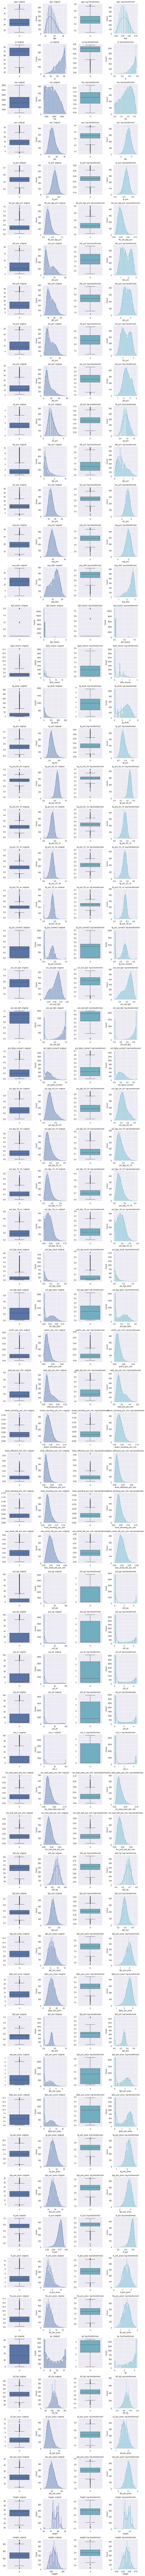

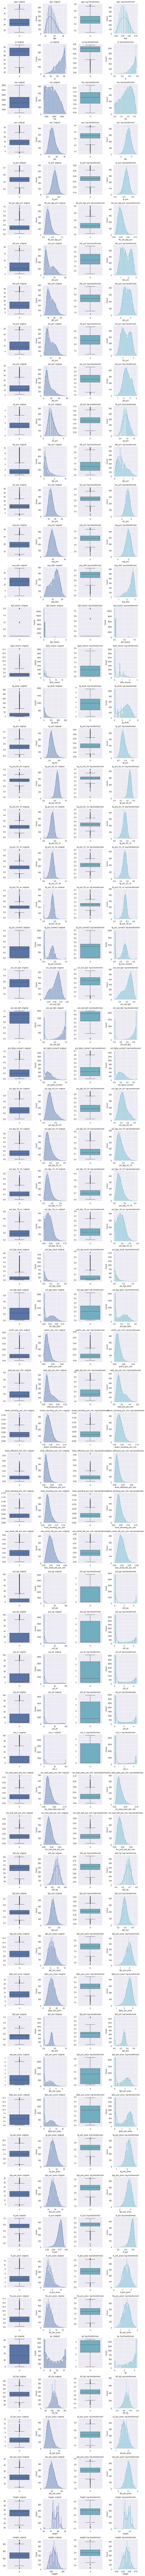

In [40]:
# %%time  

## took 8+ min
## transformations to compare against
df_num = df_slim[num_cols].copy()
df_log = df_num.apply(np.log1p)

## plotting...
fig, axes = plt.subplots(nrows=len(positive_cols), ncols=4, figsize=(12,218))
dfs = [df_num, df_log]
colors = ['b', 'c']
plots = ['original', 'log transformed']

for col, axe_row in zip(positive_cols, axes):
    for data, [ax_box, ax_hist], color, plot in zip(dfs, axe_row.reshape(2, -1), colors, plots):
        
        sns.boxplot(data=data[col], color=color, ax=ax_box)
#         sns.violinplot(data=data[col], color=color, ax=ax_box)
        ax_box.set_title(f'{col}: {plot}')
        
        sns.histplot(data=data[col], color=color, kde=True, ax=ax_hist)
        ax_hist.set_title(f'{col}: {plot}')        
        
    plt.tight_layout()
fig
plt.savefig('stat_distributions_1997_to_2020_box_hist.png', bbox_inches='tight') 

## Detecting low volume shooting outliers i.e. 100% 3p% on 1 attempt

In [17]:
shooting_cols = [col for col in df_slim.columns if 'fg_pct' in str(col)] + ['fg3_pct', 'pct_ast_fg3', 'fg3a_per_poss']
df_slim[shooting_cols].describe()

fg_pct  fg_pct_00_03  fg_pct_03_10  fg_pct_10_16  fg_pct_16_xx  \
count  7363.000000   7363.000000   7363.000000   7363.000000   7363.000000   
mean      0.453196      0.607436      0.377382      0.367697      0.377047   
std       0.055266      0.079736      0.096302      0.105792      0.112030   
min       0.282000      0.000000      0.000000      0.000000      0.000000   
25%       0.416000      0.558000      0.323000      0.315500      0.338000   
50%       0.446000      0.611000      0.383000      0.375000      0.390000   
75%       0.482000      0.661000      0.437000      0.431000      0.437000   
max       0.742000      1.000000      1.000000      1.000000      1.000000   

       fg_pct_corner3      fg3_pct  pct_ast_fg3  fg3a_per_poss  
count     7363.000000  7363.000000  7363.000000    7363.000000  
mean         0.283218     0.269541     0.683492       4.054434  
std          0.203685     0.157817     0.377047       3.442218  
min          0.000000     0.000000     0.000000       0.000000  
25%          0.000000     0.195500     0.548000       0.300000  
50%          0.336000     0.329000     0.865000       4.000000  
75%          0.420000     0.372000     0.964000       6.750000  
max          1.000000     1.000000     1.000000      17.600000

### cols to clip: `fg_pct_corner3, fg3_pct, pct_ast_fg3`
- other possibilities: `fg_pct_00_03, fg_pct_03_10, fg_pct_10_16, fg_pct_16_xx`

In [18]:
df_slim[df_slim['fg_pct_corner3']>0.9][shooting_cols][0:5]

fg_pct  fg_pct_00_03  fg_pct_03_10  fg_pct_10_16  \
player                                                                    
Vincent Askew 1997      0.435         0.493         0.444         0.444   
Corie Blount 1997       0.514         0.574         0.538         0.348   
Matt Geiger 1997        0.489         0.486         0.614         0.451   
Horace Grant 1997       0.515         0.616         0.621         0.349   
Randy Livingston 1997   0.437         0.489         0.405         0.364   

                       fg_pct_16_xx  fg_pct_corner3  fg3_pct  pct_ast_fg3  \
player                                                                      
Vincent Askew 1997            0.400             1.0    0.292        0.857   
Corie Blount 1997             0.250             1.0    0.333        0.000   
Matt Geiger 1997              0.526             1.0    0.300        1.000   
Horace Grant 1997             0.481             1.0    0.167        1.000   
Randy Livingston 1997         0.235             1.0    0.409        0.556   

                       fg3a_per_poss  
player                                
Vincent Askew 1997               1.5  
Corie Blount 1997                0.2  
Matt Geiger 1997                 1.0  
Horace Grant 1997                0.1  
Randy Livingston 1997            1.2

### Clip 3p %s and artificially low unassisted rates

In [19]:
df_slim.isna().sum().sort_values(ascending=False)

nationality             0
fg_pct_00_03            0
vorp                    0
year                    0
avg_dist                0
                       ..
pct_c                   0
plus_minus_net          0
plus_minus_on           0
tov_bad_pass_per_min    0
player_id               0
Length: 76, dtype: int64

In [20]:
## Transforming non 3-pt shooter outliers

df_non_3 = df_slim.copy()
cols3 = ['fg3a_per_poss', 'fg3_pct', 'fg_pct_corner3', 'pct_ast_fg3']
# these are the cols I want to transform:
# ---> df_non_3.loc[(df_non_3['fg3a_per_poss'] < 1) & ((df_non_3['fg3_pct'] > 0.35) | (df_non_3['pct_ast_fg3'] < 0.35))]

# get means to impute with
vals = [i/10 for i in range(11)]
means_3percent = [0]
means_assisted3s = [0]
means_corner3s = [0]

for n in vals[1:]:
    shooting_percent_mean = df_non_3[(df_non_3['fg3a_per_poss'] >= (n - 0.1)) & (df_non_3['fg3a_per_poss'] <= (n + 0.1))]['fg3_pct'].mean()
    means_3percent.append(shooting_percent_mean)
    assisted_mean = df_non_3[(df_non_3['fg3a_per_poss'] >= (n - 0.1)) & (df_non_3['fg3a_per_poss'] <= (n + 0.1))]['pct_ast_fg3'].mean()
    means_assisted3s.append(assisted_mean)
    corner_mean = df_non_3[(df_non_3['fg3a_per_poss'] >= (n - 0.1)) & (df_non_3['fg3a_per_poss'] <= (n + 0.1))]['fg_pct_corner3'].mean()
    means_corner3s.append(corner_mean)

    
## mapping dicts
percent_dict = dict(zip(vals, means_3percent))
assisted_dict = dict(zip(vals, means_assisted3s))
corner_dict = dict(zip(vals, means_corner3s))

# make transform
df_non_3.loc[(df_non_3['fg3a_per_poss'] <= 1) & (df_non_3['fg3_pct'] > 0.35), ['fg3_pct']] = df_non_3.loc[(df_non_3['fg3a_per_poss'] <= 1) & (df_non_3['fg3_pct'] > 0.35)]['fg3a_per_poss'].map(percent_dict)
df_non_3.loc[(df_non_3['fg3a_per_poss'] <= 1) & (df_non_3['pct_ast_fg3'] < 0.35), ['pct_ast_fg3']] = df_non_3.loc[(df_non_3['fg3a_per_poss'] <= 1) & (df_non_3['pct_ast_fg3'] < 0.35)]['fg3a_per_poss'].map(assisted_dict)
df_non_3.loc[(df_non_3['fg3a_per_poss'] <= 1) & (df_non_3['fg_pct_corner3'] > 0.35), ['fg_pct_corner3']] = df_non_3.loc[(df_non_3['fg3a_per_poss'] <= 1) & (df_non_3['fg_pct_corner3'] > 0.35)]['fg3a_per_poss'].map(corner_dict)

In [21]:
df_clipped = pd.read_csv('bballref_data/slim_1997_to_2020_no_trans.csv', index_col=0)
df_clipped.loc[:, cols3] = df_non_3[cols3]

In [22]:
df_clipped.isna().sum().sort_values(ascending=False)

nationality             0
fg_pct_00_03            0
vorp                    0
year                    0
avg_dist                0
                       ..
pct_c                   0
plus_minus_net          0
plus_minus_on           0
tov_bad_pass_per_min    0
player_id               0
Length: 76, dtype: int64

In [23]:
df_clipped[shooting_cols].describe()

fg_pct  fg_pct_00_03  fg_pct_03_10  fg_pct_10_16  fg_pct_16_xx  \
count  7363.000000   7363.000000   7363.000000   7363.000000   7363.000000   
mean      0.453196      0.607436      0.377382      0.367697      0.377047   
std       0.055266      0.079736      0.096302      0.105792      0.112030   
min       0.282000      0.000000      0.000000      0.000000      0.000000   
25%       0.416000      0.558000      0.323000      0.315500      0.338000   
50%       0.446000      0.611000      0.383000      0.375000      0.390000   
75%       0.482000      0.661000      0.437000      0.431000      0.437000   
max       0.742000      1.000000      1.000000      1.000000      1.000000   

       fg_pct_corner3      fg3_pct  pct_ast_fg3  fg3a_per_poss  
count     7363.000000  7363.000000  7363.000000    7363.000000  
mean         0.267189     0.258997     0.705943       4.054434  
std          0.188826     0.149258     0.346001       3.442218  
min          0.000000     0.000000     0.000000       0.000000  
25%          0.000000     0.167000     0.576279       0.300000  
50%          0.329000     0.323000     0.867000       4.000000  
75%          0.411000     0.368000     0.964000       6.750000  
max          1.000000     0.538000     1.000000      17.600000

## checking out other anomolies

In [24]:
df_test = df_slim.copy()
df_test[df_test['fg_pct_03_10']==1.0][shooting_cols + ['pct_fga_03_10']]

fg_pct  fg_pct_00_03  fg_pct_03_10  fg_pct_10_16  \
player                                                                
Jud Buechler 2002   0.373         0.556           1.0         0.250   
Steve Novak 2009    0.444         0.667           1.0         0.444   
J.J. Redick 2009    0.391         0.600           1.0         0.389   

                   fg_pct_16_xx  fg_pct_corner3  fg3_pct  pct_ast_fg3  \
player                                                                  
Jud Buechler 2002         0.314           0.394    0.350        0.952   
Steve Novak 2009          0.505           0.508    0.416        0.983   
J.J. Redick 2009          0.338           0.474    0.374        0.896   

                   fg3a_per_poss  pct_fga_03_10  
player                                           
Jud Buechler 2002            4.5          0.008  
Steve Novak 2009            12.8          0.005  
J.J. Redick 2009             8.4          0.010

In [25]:

# df_slim[(df_slim['fg3a_per_poss']<=1) & (df_slim['fg3_pct'] > 0.5)][shooting_cols]
# df_test[(df_test['fg3a_per_poss']<=1) & (df_test['fg3_pct'] > 0.5)][shooting_cols]
df_test[(df_test['fg3a_per_poss'] <= 1) & (df_test['fg_pct_corner3'] > 0.5)][shooting_cols]

fg_pct  fg_pct_00_03  fg_pct_03_10  fg_pct_10_16  \
player                                                                    
Corie Blount 1997       0.514         0.574         0.538         0.348   
Matt Geiger 1997        0.489         0.486         0.614         0.451   
Horace Grant 1997       0.515         0.616         0.621         0.349   
Loren Meyer 1997        0.443         0.573         0.411         0.348   
John Wallace 1997       0.517         0.608         0.333         0.419   
...                       ...           ...           ...           ...   
Enes Kanter 2019        0.549         0.661         0.348         0.300   
Boban Marjanović 2019   0.615         0.731         0.471         0.577   
Jaxson Hayes 2020       0.672         0.751         0.250         0.333   
Nerlens Noel 2020       0.684         0.861         0.540         0.278   
Ben Simmons 2020        0.580         0.719         0.365         0.154   

                       fg_pct_16_xx  fg_pct_corner3  fg3_pct  pct_ast_fg3  \
player                                                                      
Corie Blount 1997             0.250           1.000    0.333         0.00   
Matt Geiger 1997              0.526           1.000    0.300         1.00   
Horace Grant 1997             0.481           1.000    0.167         1.00   
Loren Meyer 1997              0.304           1.000    0.571         0.75   
John Wallace 1997             0.636           1.000    0.500         1.00   
...                             ...             ...      ...          ...   
Enes Kanter 2019              0.350           1.000    0.294         0.90   
Boban Marjanović 2019         0.273           1.000    0.400         1.00   
Jaxson Hayes 2020             0.000           1.000    0.250         1.00   
Nerlens Noel 2020             0.267           1.000    0.333         1.00   
Ben Simmons 2020              0.000           0.667    0.286         1.00   

                       fg3a_per_poss  
player                                
Corie Blount 1997                0.2  
Matt Geiger 1997                 1.0  
Horace Grant 1997                0.1  
Loren Meyer 1997                 0.5  
John Wallace 1997                0.3  
...                              ...  
Enes Kanter 2019                 1.0  
Boban Marjanović 2019            0.7  
Jaxson Hayes 2020                0.2  
Nerlens Noel 2020                0.1  
Ben Simmons 2020                 0.2  

[100 rows x 9 columns]

## Decide which positive columns to log transform based on plots above

In [28]:
log_cols = ['mp',
            'per',
            'orb_pct',
            'drb_pct',
            'trb_pct',
            'ast_pct',
            'stl_pct',
            'blk_pct',
            'usg_pct',
            'fg_dunk_per_min',
            'and1s_per_min',
            'astd_pts_per_min',
            'drawn_shooting_per_min',
            'fouls_offensive_per_min',
            'own_shots_blk_per_min',
            'tov_bad_pass_per_min',
            'tov_lost_ball_per_min',
            'fg3_per_poss',
            'fg3a_per_poss',
            'ft_per_poss',
            'fta_per_poss',
            'pf_per_poss',          
           ]

len(log_cols)

22

In [29]:
df_log = df_clipped.copy()
df_log.loc[:, log_cols] = df_log[log_cols].apply(np.log1p)
df_log.shape
df_log.head()

(7363, 76)

player_id pos  age team_id   g        mp       per  \
player                                                                         
Mahmoud Abdul-Rauf 1997   abdulma02  PG   27     SAC  75  7.664816  2.653242   
Shareef Abdur-Rahim 1997  abdursh01  PF   20     VAN  80  7.938446  2.912351   
Cory Alexander 1997       alexaco01  PG   23     SAS  80  7.282761  2.727853   
Jerome Allen 1997         allenje01  SG   24     TOT  76  6.850126  2.272126   
Ray Allen 1997            allenra02  SG   21     MIL  82  7.837160  2.747271   

                          ts_pct  fta_per_fga_pct   orb_pct  ...  ft_per_poss  \
player                                                       ...                
Mahmoud Abdul-Rauf 1997    0.524            0.147  0.641854  ...     1.335001   
Shareef Abdur-Rahim 1997   0.518            0.428  2.282382  ...     2.140066   
Cory Alexander 1997        0.528            0.263  1.193922  ...     1.526056   
Jerome Allen 1997          0.451            0.326  1.410987  ...     1.223775   
Ray Allen 1997             0.541            0.274  1.740466  ...     1.667707   

                          fta_per_poss  gs  off_rtg  pf_per_poss  \
player                                                             
Mahmoud Abdul-Rauf 1997       1.481605  51    105.0     1.667707   
Shareef Abdur-Rahim 1997      2.406945  71    102.0     1.589235   
Cory Alexander 1997           1.774952   6    101.0     1.887070   
Jerome Allen 1997             1.629241   1     95.0     1.757858   
Ray Allen 1997                1.840550  81    109.0     1.722767   

                          pts_per_poss  height  weight     salary  \
player                                                              
Mahmoud Abdul-Rauf 1997           25.5      73     162  3100000.0   
Shareef Abdur-Rahim 1997          28.9      81     225  2186000.0   
Cory Alexander 1997               21.8      73     185   521000.0   
Jerome Allen 1997                 12.9      76     184   247500.0   
Ray Allen 1997                    23.3      77     205  1785000.0   

                                       nationality  
player                                              
Mahmoud Abdul-Rauf 1997   United States of America  
Shareef Abdur-Rahim 1997  United States of America  
Cory Alexander 1997       United States of America  
Jerome Allen 1997         United States of America  
Ray Allen 1997            United States of America  

[5 rows x 76 columns]

In [30]:
df_log.to_csv('bballref_data/clipped3s_logged_1997_to_2020.csv')

In [31]:
df_scaled = df_log.copy()
obj_cols = df_scaled.select_dtypes('O').columns
obj_cols

Index(['player_id', 'pos', 'team_id', 'salary', 'nationality'], dtype='object')

### Drop object cols

In [32]:
obj_cols = df_scaled.select_dtypes('O').columns
df_scaled.drop(obj_cols, inplace=True, axis=1)

In [33]:
df_scaled.describe()

age            g           mp          per       ts_pct  \
count  7363.000000  7363.000000  7363.000000  7363.000000  7363.000000   
mean     26.942686    67.097379     7.373859     2.705854     0.533142   
std       4.236166    13.040807     0.421321     0.268733     0.046930   
min      18.000000    19.000000     6.478510     1.386294     0.338000   
25%      24.000000    59.000000     7.057898     2.533697     0.503000   
50%      26.000000    70.000000     7.428333     2.714695     0.533000   
75%      30.000000    78.000000     7.718463     2.879198     0.563000   
max      43.000000    85.000000     8.156510     3.493473     0.726000   

       fta_per_fga_pct      orb_pct      drb_pct      trb_pct      ast_pct  \
count      7363.000000  7363.000000  7363.000000  7363.000000  7363.000000   
mean          0.293513     1.687232     2.682193     2.319157     2.548486   
std           0.136260     0.597496     0.365292     0.404432     0.595857   
min           0.024000     0.182322     1.360977     1.223775     0.530628   
25%           0.196000     1.193922     2.388763     1.987874     2.128232   
50%           0.271000     1.629241     2.674149     2.292535     2.501436   
75%           0.365000     2.230014     2.970414     2.667228     2.995732   
max           1.219000     3.068053     3.663562     3.321432     4.065602   

       ...  fga_per_poss       ft_pct  ft_per_poss  fta_per_poss           gs  \
count  ...   7363.000000  7363.000000  7363.000000   7363.000000  7363.000000   
mean   ...     17.050672     0.747436     1.465939      1.697087    37.458645   
std    ...      4.529606     0.102610     0.405554      0.414686    28.739507   
min    ...      3.600000     0.111000     0.095310      0.262364     0.000000   
25%    ...     13.900000     0.694000     1.193922      1.410987     9.000000   
50%    ...     16.800000     0.765000     1.481605      1.704748    33.000000   
75%    ...     20.050000     0.820000     1.740466      1.987874    66.000000   
max    ...     35.000000     1.000000     2.631889      2.912351    83.000000   

           off_rtg  pf_per_poss  pts_per_poss       height       weight  
count  7363.000000  7363.000000   7363.000000  7363.000000  7363.000000  
mean    106.535515     1.704531     20.539712    76.965775   219.818552  
std       8.089367     0.262902      5.969680     4.249828    27.374260  
min      74.000000     0.875469      3.900000    60.000000   135.000000  
25%     101.000000     1.526056     16.300000    73.000000   200.000000  
50%     106.000000     1.686399     20.000000    78.000000   220.000000  
75%     112.000000     1.887070     24.200000    80.000000   240.000000  
max     144.000000     2.694627     48.200000    91.000000   325.000000  

[8 rows x 71 columns]

### Create version for 2000-2020

In [34]:
df_scaled_2000_2020 = df_scaled.copy()
df_scaled_2000_2020 = df_scaled_2000_2020[df_scaled_2000_2020['year'] >= 2000]
df_scaled_2000_2020.shape

zscores = StandardScaler().fit_transform(df_scaled_2000_2020)
df_scaled_2000_2020 = pd.DataFrame(zscores, index=df_scaled_2000_2020.index, columns=df_scaled_2000_2020.columns)
df_scaled_2000_2020.to_csv('bballref_data/scaled_2000_to_2020.csv')
df_scaled_2000_2020.describe()

(6541, 71)

age             g            mp           per        ts_pct  \
count  6.541000e+03  6.541000e+03  6.541000e+03  6.541000e+03  6.541000e+03   
mean  -2.042226e-16 -1.216646e-16 -1.042839e-16 -2.274693e-15 -1.060220e-15   
std    1.000076e+00  1.000076e+00  1.000076e+00  1.000076e+00  1.000076e+00   
min   -1.851133e+00 -3.859505e+00 -2.145984e+00 -4.854178e+00 -4.168554e+00   
25%   -6.686856e-01 -6.061987e-01 -7.378887e-01 -6.291111e-01 -6.472672e-01   
50%   -1.957067e-01  1.872907e-01  1.330209e-01  3.737547e-02 -1.089005e-02   
75%    7.502512e-01  8.220822e-01  8.154823e-01  6.431256e-01  6.466997e-01   
max    3.824614e+00  1.377525e+00  1.855251e+00  2.905060e+00  4.061924e+00   

       fta_per_fga_pct       orb_pct       drb_pct       trb_pct  \
count     6.541000e+03  6.541000e+03  6.541000e+03  6.541000e+03   
mean     -1.564259e-16 -2.607098e-17 -3.389227e-16  5.703026e-16   
std       1.000076e+00  1.000076e+00  1.000076e+00  1.000076e+00   
min      -1.949832e+00 -2.350964e+00 -3.664214e+00 -2.722163e+00   
25%      -7.077266e-01 -8.472260e-01 -8.050957e-01 -8.251171e-01   
50%      -1.711957e-01 -1.022119e-01 -2.442562e-02 -6.872958e-02   
75%       5.123299e-01  9.157068e-01  7.876276e-01  8.442293e-01   
max       6.833104e+00  2.220339e+00  2.684753e+00  2.485739e+00   

            ast_pct  ...  fga_per_poss        ft_pct   ft_per_poss  \
count  6.541000e+03  ...  6.541000e+03  6.541000e+03  6.541000e+03   
mean  -4.551558e-16  ... -1.325275e-16  2.520194e-16 -1.911872e-16   
std    1.000076e+00  ...  1.000076e+00  1.000076e+00  1.000076e+00   
min   -3.391262e+00  ... -2.959098e+00 -6.244929e+00 -3.337393e+00   
25%   -7.223455e-01  ... -6.940978e-01 -5.221584e-01 -6.441428e-01   
50%   -8.786591e-02  ... -5.637933e-02  1.724002e-01  4.751581e-03   
75%    7.579838e-01  ...  6.693003e-01  7.006560e-01  6.957103e-01   
max    2.558781e+00  ...  3.945854e+00  2.451726e+00  2.881035e+00   

       fta_per_poss            gs       off_rtg   pf_per_poss  pts_per_poss  \
count  6.541000e+03  6.541000e+03  6.541000e+03  6.541000e+03  6.541000e+03   
mean  -6.952260e-17 -1.347000e-16 -1.738065e-16 -5.040389e-16 -5.214195e-17   
std    1.000076e+00  1.000076e+00  1.000076e+00  1.000076e+00  1.000076e+00   
min   -3.412343e+00 -1.298839e+00 -4.013959e+00 -3.140829e+00 -2.675798e+00   
25%   -6.569629e-01 -9.875573e-01 -6.992826e-01 -7.374066e-01 -7.106158e-01   
50%    4.772761e-02 -1.574730e-01  3.731209e-02 -4.031830e-02 -9.441472e-02   
75%    6.938184e-01  9.838929e-01  6.511410e-01  6.685525e-01  6.050568e-01   
max    2.944592e+00  1.571869e+00  4.579646e+00  3.814542e+00  4.602037e+00   

             height        weight  
count  6.541000e+03  6.541000e+03  
mean   6.984849e-16  2.824356e-16  
std    1.000076e+00  1.000076e+00  
min   -4.059931e+00 -3.133852e+00  
25%   -9.526513e-01 -7.521728e-01  
50%    3.434953e-03 -1.934853e-02  
75%    7.204996e-01  7.134758e-01  
max    3.110715e+00  3.827979e+00  

[8 rows x 71 columns]

In [35]:
zscores = StandardScaler().fit_transform(df_scaled)
df_scaled = pd.DataFrame(zscores, index=df_scaled.index, columns=df_scaled.columns)

In [36]:
df_scaled.describe()

age             g            mp           per        ts_pct  \
count  7.363000e+03  7.363000e+03  7.363000e+03  7.363000e+03  7.363000e+03   
mean  -3.396863e-16  2.779252e-16  3.103498e-15  3.367913e-16  5.249698e-16   
std    1.000068e+00  1.000068e+00  1.000068e+00  1.000068e+00  1.000068e+00   
min   -2.111177e+00 -3.688472e+00 -2.125243e+00 -4.910637e+00 -4.158404e+00   
25%   -6.947052e-01 -6.209684e-01 -7.499808e-01 -6.406688e-01 -6.423087e-01   
50%   -2.225481e-01  2.225950e-01  1.293013e-01  3.290076e-02 -3.018604e-03   
75%    7.217662e-01  8.360956e-01  8.179672e-01  6.450884e-01  6.362715e-01   
max    3.790788e+00  1.372909e+00  1.857736e+00  2.931062e+00  4.109747e+00   

       fta_per_fga_pct       orb_pct       drb_pct       trb_pct  \
count     7.363000e+03  7.363000e+03  7.363000e+03  7.363000e+03   
mean      2.316043e-16 -1.698432e-16  1.505428e-16 -5.288299e-16   
std       1.000068e+00  1.000068e+00  1.000068e+00  1.000068e+00   
min      -1.978067e+00 -2.518866e+00 -3.617124e+00 -2.708628e+00   
25%      -7.156880e-01 -8.256839e-01 -8.033310e-01 -8.191864e-01   
50%      -1.652320e-01 -9.706394e-02 -2.202368e-02 -6.583122e-02   
75%       5.246729e-01  9.084900e-01  7.890699e-01  8.606996e-01   
max       6.792532e+00  2.311169e+00  2.686714e+00  2.478396e+00   

            ast_pct  ...  fga_per_poss        ft_pct   ft_per_poss  \
count  7.363000e+03  ...  7.363000e+03  7.363000e+03  7.363000e+03   
mean   5.761157e-16  ... -2.952955e-16  1.057660e-15 -3.088058e-17   
std    1.000068e+00  ...  1.000068e+00  1.000068e+00  1.000068e+00   
min   -3.386710e+00  ... -2.969703e+00 -6.202879e+00 -3.379879e+00   
25%   -7.053415e-01  ... -6.956204e-01 -5.208039e-01 -6.707749e-01   
50%   -7.896689e-02  ... -5.534462e-02  1.711812e-01  3.862978e-02   
75%    7.506450e-01  ...  6.622058e-01  7.072260e-01  6.769652e-01   
max    2.546282e+00  ...  3.962938e+00  2.461554e+00  2.875154e+00   

       fta_per_poss            gs       off_rtg   pf_per_poss  pts_per_poss  \
count  7.363000e+03  7.363000e+03  7.363000e+03  7.363000e+03  7.363000e+03   
mean   1.544029e-17  9.650180e-17  4.477683e-16 -2.161640e-16  3.860072e-17   
std    1.000068e+00  1.000068e+00  1.000068e+00  1.000068e+00  1.000068e+00   
min   -3.460015e+00 -1.303474e+00 -4.022283e+00 -3.153717e+00 -2.787560e+00   
25%   -6.899660e-01 -9.902946e-01 -6.843418e-01 -6.789106e-01 -7.102558e-01   
50%    1.847599e-02 -1.551504e-01 -6.620442e-02 -6.897427e-02 -9.041501e-02   
75%    7.012707e-01  9.931727e-01  6.755604e-01  6.943682e-01  6.131880e-01   
max    2.930762e+00  1.584733e+00  4.631639e+00  3.766281e+00  4.633777e+00   

             height        weight  
count  7.363000e+03  7.363000e+03  
mean  -3.126658e-16 -4.053075e-16  
std    1.000068e+00  1.000068e+00  
min   -3.992380e+00 -3.098689e+00  
25%   -9.332246e-01 -7.240341e-01  
50%    2.433735e-01  6.628859e-03  
75%    7.140127e-01  7.372918e-01  
max    3.302528e+00  3.842609e+00  

[8 rows x 71 columns]

In [37]:
df_scaled.to_csv('bballref_data/scaled_1997_to_2020.csv')

In [38]:
sorted(df_scaled.columns)

['age',
 'and1s_per_min',
 'ast_pct',
 'astd_pts_per_min',
 'avg_dist',
 'blk_pct',
 'bpm',
 'dbpm',
 'def_rtg',
 'drawn_shooting_per_min',
 'drb_pct',
 'fg2_pct',
 'fg2_per_poss',
 'fg2a_per_poss',
 'fg3_heave',
 'fg3_pct',
 'fg3_per_poss',
 'fg3a_heave',
 'fg3a_per_poss',
 'fg_dunk_per_min',
 'fg_pct',
 'fg_pct_00_03',
 'fg_pct_03_10',
 'fg_pct_10_16',
 'fg_pct_16_xx',
 'fg_pct_corner3',
 'fg_per_poss',
 'fga_per_poss',
 'fouls_offensive_per_min',
 'fouls_shooting_per_min',
 'ft_pct',
 'ft_per_poss',
 'fta_per_fga_pct',
 'fta_per_poss',
 'g',
 'gs',
 'height',
 'mp',
 'obpm',
 'off_rtg',
 'orb_pct',
 'own_shots_blk_per_min',
 'pct_ast_fg2',
 'pct_ast_fg3',
 'pct_c',
 'pct_fg3a_corner3',
 'pct_fga_00_03',
 'pct_fga_03_10',
 'pct_fga_10_16',
 'pct_fga_16_xx',
 'pct_fga_dunk',
 'pct_fga_fg3a',
 'pct_pf',
 'pct_pg',
 'pct_sf',
 'pct_sg',
 'per',
 'pf_per_poss',
 'plus_minus_net',
 'plus_minus_on',
 'pts_per_poss',
 'stl_pct',
 'tov_bad_pass_per_min',
 'tov_lost_ball_per_min',
 'tov_pct',